<a href="https://colab.research.google.com/github/AndreySolot/ASolotDS/blob/main/%D0%A2%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%BE%D0%B5_Ozon_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Тестовое в OZON

## Задание 1

Для выполнения этого задания требуется сгенерировать `DataFrame` с синтетическими данными. `DataFrame` должен состоять из `10000` строк и `5` колонок. Каждую из колонок мы предлагаем тебе создать и наполнить следующим образом:

* 1-я колонка – `user_id` – идентификатор пользователя. Длина `user_id` должна равняться 15-ти символам. Идентификатор состоит из случайной комбинации следующих символов: `"1234567890abcdefghijk"`. Для каждой строки в `DataFrame` значение `user_id` формируются случайным образом.

* 2-я колонка – `order_number` – номер заказа. Столбец необходимо заполнить случайными значениями в диапазоне от `1` до `10`.

* 3-я колонка – `click2delivery` – время, прошедшее с момента оформления заказа до вручения клиенту. Столбец необходимо заполнить случайными значениями из нормального распределения со средним `1440` и стандартным отклонением `200`.

* 4-я колонка – `order_items_sum` – общая стоимость заказа. Значения для этого столбца необходимо взять из экспоненциального распределения с параметром `λ = 1`, смещённого на `+1`.

* 5-я колонка – `retention` – день жизни покупателя, в который он совершил заказ. Необходимо сгенерировать значения `1, 2, 3, 4, 5` с вероятностями `0.35, 0.25, 0.2, 0.15` и `0.05` соответственно.

В случае, если в колонке `user_id` встречаются дублирующиеся значения, оставь только первое из них.

In [ ]:
import pandas as pd
import random
import numpy as np

In [ ]:
np.random.seed(42)
random.seed(42)

In [ ]:
def generate_user_id(n=15):
  return ''.join([random.choice('1234567890abcdefghijk') for _ in range(n)])

In [ ]:
def generate_user_id2(n=15):
  s = ''
  for i in range(n):
    s = s + random.choice('1234567890abcdefghijk')
  return s

In [ ]:
generate_user_id2()

'h4c3h0kjbi73280'

In [ ]:
''.join([random.choice('1234567890abcdefghijk') for _ in range(n)])

In [ ]:
[random.choice('1234567890abcdefghijk') for _ in range(15)]

['g', 'j', '1', 'h', '7', 'k', 'h', 'd', '8', 'e', 'i', '9', '1', '6', 'd']

In [ ]:
N = 10_000
n = 10_000

def generate_df(N):
  data = {
      'user_id': [generate_user_id() for _ in range(N)],
      'order_num': [random.randint(1, 10) for _ in range(N)],
      'click2delivery': np.random.normal(1440, 200, size=N),
      'order_items_sum': np.random.exponential(1, size=N) + 1,
      'retention': np.random.choice([1, 2, 3, 4, 5], size=N, p=[0.35, 0.25, 0.2, 0.15, 0.05])
  }
  return pd.DataFrame(data)

df = pd.DataFrame()

while True:
  new_df = generate_df(n)
  df = pd.concat([df, new_df], ignore_index=True)
  df = df.drop_duplicates(subset='user_id', keep='first')
  n = N - len(df)

  if n <= 0:
    break

In [ ]:
df

,user_id,order_num,click2delivery,order_items_sum,retention
0,i36b56c88j675j6,6,1624.900931,3.398312,4
1,0h97ia18k09dd8i,4,1057.585816,1.755740,4
2,a6ch9abbidjkb8c,3,1483.478339,1.388331,1
3,5fak97i9k2bek6c,1,1716.562685,4.294617,1
4,172b4g5j4if0djc,5,1580.041797,2.014197,3
...,...,...,...,...,...
9995,7j7bi6e3825a98k,3,1784.472905,3.548662,3
9996,fgeffid47eb7cg0,3,1574.688535,1.312788,2
9997,gf701664951g0g1,6,1036.342482,1.358910,2
9998,21h8iga67k8gd8j,2,1559.792458,2.493757,4


In [ ]:
len(df['user_id'].unique())

10000

## Задание 2

Для всех строк исходного датасета, сгруппированных по номеру заказа, посчитать среднее значение времени доставки по группе. Результат необходимо добавить в новый столбец датафрейма.

In [ ]:
df

,user_id,order_num,click2delivery,order_items_sum,retention
0,i36b56c88j675j6,6,1624.900931,3.398312,4
1,0h97ia18k09dd8i,4,1057.585816,1.755740,4
2,a6ch9abbidjkb8c,3,1483.478339,1.388331,1
3,5fak97i9k2bek6c,1,1716.562685,4.294617,1
4,172b4g5j4if0djc,5,1580.041797,2.014197,3
...,...,...,...,...,...
9995,7j7bi6e3825a98k,3,1784.472905,3.548662,3
9996,fgeffid47eb7cg0,3,1574.688535,1.312788,2
9997,gf701664951g0g1,6,1036.342482,1.358910,2
9998,21h8iga67k8gd8j,2,1559.792458,2.493757,4


In [ ]:
orders = (
    df
    .groupby('order_num')['click2delivery']
    .agg(mean_time='mean')
    .reset_index()
)

orders

,order_num,mean_time
0,1,1448.934543
1,2,1443.936205
2,3,1441.595285
3,4,1429.960859
4,5,1448.508122
5,6,1433.560455
6,7,1443.299260
7,8,1442.885335
8,9,1437.047760
9,10,1446.437446


In [ ]:
df = df.merge(
    orders,
    how='inner',
    left_on='order_num',
    right_on='order_num'
)

df

,user_id,order_num,click2delivery,order_items_sum,retention,mean_time
0,i36b56c88j675j6,6,1624.900931,3.398312,4,1433.560455
1,ahd62f10fi1621i,6,1444.466353,1.735054,2,1433.560455
2,8b4cjh8076hj418,6,1375.515570,1.793610,2,1433.560455
3,f47dh5jck1h96j9,6,1387.556311,3.272043,3,1433.560455
4,3jf4gdee4ik7j5d,6,1754.973421,1.036842,2,1433.560455
...,...,...,...,...,...,...
9995,5jc0dg9je339479,7,1642.965278,2.477151,1,1443.299260
9996,kdb41f2gg887eki,7,1434.421122,1.920288,2,1443.299260
9997,c0ke4cjf0a1g9kb,7,1305.899436,2.079957,1,1443.299260
9998,ee61d756j10ajkc,7,1099.310011,3.795341,3,1443.299260


## Задание 3

Отдельной колонкой добавить значения последовательности, начинающейся с `0` и `1`, где каждый следующий элемент является суммой двух предыдущих, умноженных на `0.5`.

In [ ]:
arr = [0, 1]

for i in range(10):
  arr.append(sum(arr[-2:]))

arr

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]

In [ ]:
arr = [0, 1]

for i in range(9998):
  arr.append(sum(arr[-2:]) * 0.5)

In [ ]:
len(arr)

10000

In [ ]:
arr[:10]

[0, 1, 0.5, 0.75, 0.625, 0.6875, 0.65625, 0.671875, 0.6640625, 0.66796875]

In [ ]:
df['seq'] = arr

In [ ]:
df.head()

,user_id,order_num,click2delivery,order_items_sum,retention,mean_time,seq
0,i36b56c88j675j6,6,1624.900931,3.398312,4,1433.560455,0.000
1,ahd62f10fi1621i,6,1444.466353,1.735054,2,1433.560455,1.000
2,8b4cjh8076hj418,6,1375.515570,1.793610,2,1433.560455,0.500
3,f47dh5jck1h96j9,6,1387.556311,3.272043,3,1433.560455,0.750
4,3jf4gdee4ik7j5d,6,1754.973421,1.036842,2,1433.560455,0.625


In [ ]:
arr = [1, 2, 3, 4, 5]

In [ ]:
sum(arr[-2:])

9

## Задание 4

Напиши функцию, которая принимает на вход значение `user_id` и возвращает строку следующего вида: все буквы в той последовательности, в которой они встречаются в `user_id`, затем квадрат числа, полученного из всех цифр в `user_id` в той последовательности, в которой они встречаются в `user_id`.

Добавь результат применения этой функции к `user_id` в новый столбец. Использование циклов вне функции запрещено.

In [ ]:
df['user_id'][0]

# ibcjj13372820746208203536
# 3656886756 ** 2

'i36b56c88j675j6'

In [ ]:
3656886756 ** 2

13372820746208203536

In [ ]:
list(filter(str.isalpha, 'ibcjj13372820746208203536'))

['i', 'b', 'c', 'j', 'j']

In [ ]:
def process_user_id(user_id):
  letters = ''.join(filter(str.isalpha, user_id))
  digits = ''.join(filter(str.isdigit, user_id))

  return f'{letters}{int(digits) ** 2}'

In [ ]:
process_user_id('i36b56c88j675j6')

'ibcjj13372820746208203536'

In [ ]:
df['transformed_user_id'] = df['user_id'].apply(process_user_id)

In [ ]:
df.head()

,user_id,order_num,click2delivery,order_items_sum,retention,mean_time,seq,transformed_user_id
0,i36b56c88j675j6,6,1624.900931,3.398312,4,1433.560455,0.000,ibcjj13372820746208203536
1,ahd62f10fi1621i,6,1444.466353,1.735054,2,1433.560455,1.000,ahdffii3856611330827641
2,8b4cjh8076hj418,6,1375.515570,1.793610,2,1433.560455,0.500,bcjhhj719233610767710724
3,f47dh5jck1h96j9,6,1387.556311,3.272043,3,1433.560455,0.750,fdhjckhj22581209376961
4,3jf4gdee4ik7j5d,6,1754.973421,1.036842,2,1433.560455,0.625,jfgdeeikjd1188525625


## Задание 5

Вычисли моду, медиану, среднее, стандартное отклонение для столбцов
`click2delivery`, `order_items_sum` и `retention`. Построй гистограммы распределения значений в столбцах.

In [ ]:
df2 = df[['click2delivery', 'order_items_sum', 'retention']]

df2

,click2delivery,order_items_sum,retention
0,1624.900931,3.398312,4
1,1444.466353,1.735054,2
2,1375.515570,1.793610,2
3,1387.556311,3.272043,3
4,1754.973421,1.036842,2
...,...,...,...
9995,1642.965278,2.477151,1
9996,1434.421122,1.920288,2
9997,1305.899436,2.079957,1
9998,1099.310011,3.795341,3


In [ ]:
df_rounded = df2.copy()

df_rounded[['click2delivery', 'order_items_sum']] = df_rounded[['click2delivery', 'order_items_sum']].astype(int)

df_rounded

,click2delivery,order_items_sum,retention
0,1624,3,4
1,1444,1,2
2,1375,1,2
3,1387,3,3
4,1754,1,2
...,...,...,...
9995,1642,2,1
9996,1434,1,2
9997,1305,2,1
9998,1099,3,3


In [ ]:
modes = (
    df_rounded
    .mode()
    .head(1)
    .set_index(pd.Index(['mode']))
)

modes

,click2delivery,order_items_sum,retention
mode,1510,1,1


In [ ]:
described_df = (
    df2
    .describe()
    .loc[['mean', 'std', '50%'], :]
)

described_df

,click2delivery,order_items_sum,retention
mean,1441.562751,2.014509,2.306500
std,201.022115,1.016942,1.235196
50%,1438.560890,1.701817,2.000000


In [ ]:
described_df = pd.concat([described_df, modes])

In [ ]:
described_df

,click2delivery,order_items_sum,retention
mean,1441.562751,2.014509,2.306500
std,201.022115,1.016942,1.235196
50%,1438.560890,1.701817,2.000000
mode,1510.000000,1.000000,1.000000


In [ ]:
import seaborn as sns

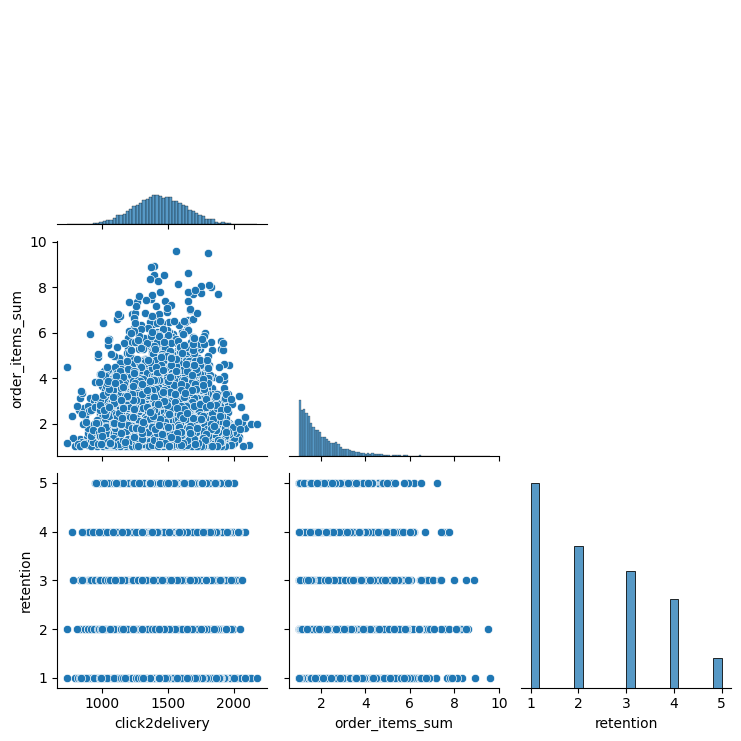

In [ ]:
sns.pairplot(df[['click2delivery', 'order_items_sum', 'retention']], corner=True);

## Задание 6

Построй график, который наиболее полно, на твой взгляд, описывает зависимость времени доставки заказа от его номера. Обоснуй, почему ты так считаешь?

In [ ]:
df.head()

,user_id,order_num,click2delivery,order_items_sum,retention,mean_time,seq,transformed_user_id
0,i36b56c88j675j6,6,1624.900931,3.398312,4,1433.560455,0.000,ibcjj13372820746208203536
1,ahd62f10fi1621i,6,1444.466353,1.735054,2,1433.560455,1.000,ahdffii3856611330827641
2,8b4cjh8076hj418,6,1375.515570,1.793610,2,1433.560455,0.500,bcjhhj719233610767710724
3,f47dh5jck1h96j9,6,1387.556311,3.272043,3,1433.560455,0.750,fdhjckhj22581209376961
4,3jf4gdee4ik7j5d,6,1754.973421,1.036842,2,1433.560455,0.625,jfgdeeikjd1188525625


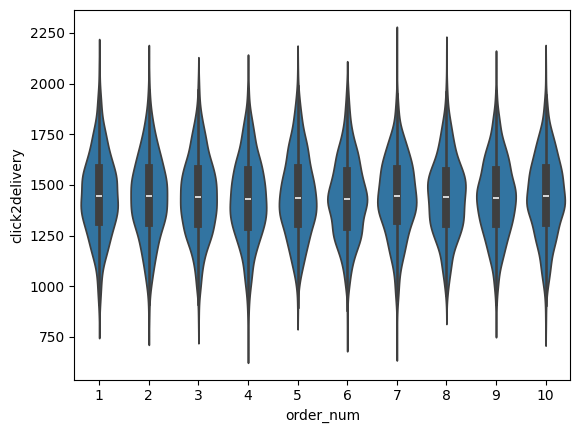

In [ ]:
sns.violinplot(data=df[['click2delivery', 'order_num']], x='order_num', y='click2delivery');